#Step 1: Data Cleaning

In [2]:
import pandas as pd
import numpy as np

# Load the dataset (replace with your actual data loading method if needed)
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# 1. Check for missing values
print("Missing Values:\n", data.isnull().sum())

# 2. Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())

# 3. Check data types
print("\nData Types:\n", data.dtypes)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate Rows: 0

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object

In [4]:
# 2. Convert TotalCharges to numeric, handle non-numeric or empty values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [5]:
# Fill missing TotalCharges with MonthlyCharges * tenure for consistency
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'])

In [6]:
# 3. Drop customerID (not useful for modeling)
data = data.drop('customerID', axis=1)

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# 4. Convert SeniorCitizen to categorical (0/1 can be treated as category)
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

In [9]:
# 5. Ensure categorical columns are treated as categories
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    data[col] = data[col].astype('category')

In [10]:
# 6. Check for duplicates
print("Duplicate customerIDs:", data.duplicated().sum())

Duplicate customerIDs: 22


In [11]:
# 7. Verify data types
print("\nData Types:\n", data.dtypes)


Data Types:
 gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [12]:
# 8. Check for any illogical values (e.g., negative tenure or charges)
#Numerical summary to confirm no negative or illogical values
print("\nSummary of Numerical Columns:\n", data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Summary of Numerical Columns:
             tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [13]:
# Save cleaned dataset (optional)
data.to_csv('cleaned_churn_data.csv', index=False)

#Step 2: Exploratory Data Analysis (EDA)



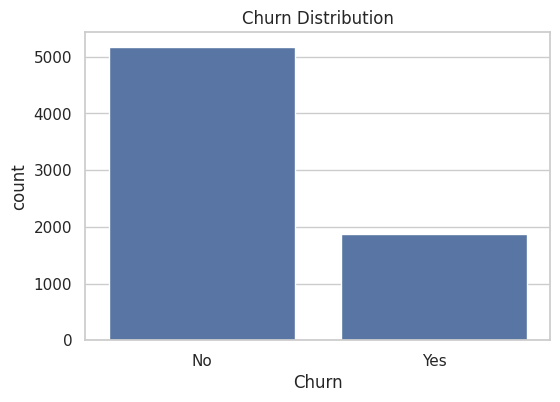

Churn Proportion:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()
print("Churn Proportion:\n", data['Churn'].value_counts(normalize=True))

####Customer Churn "Customer Churn" is a binary concept, meaning customers either churn (leave or stop doing business with a company) or they don't. It is a simple yes or no question – either a customer has churned or they have not

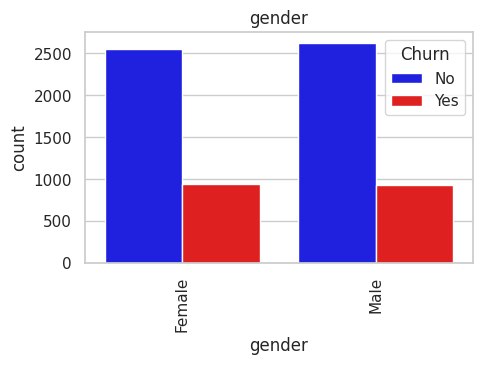

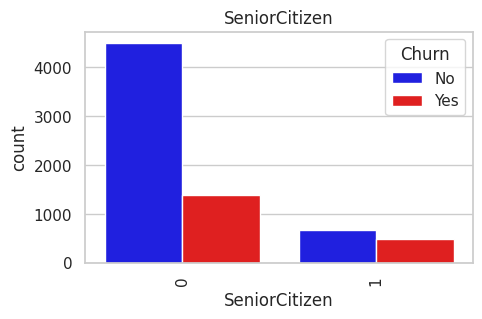

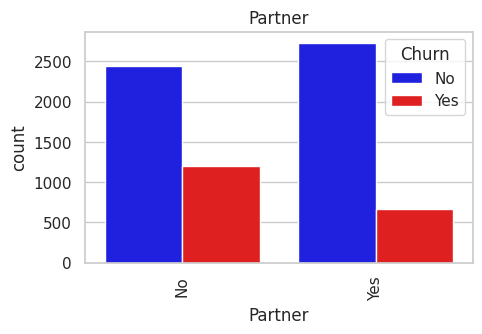

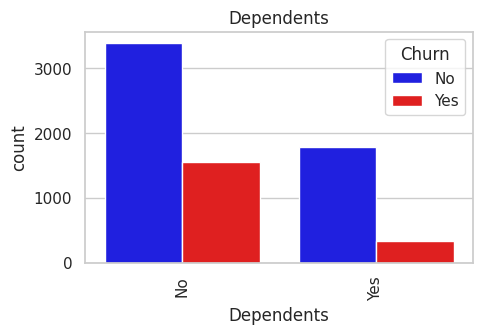

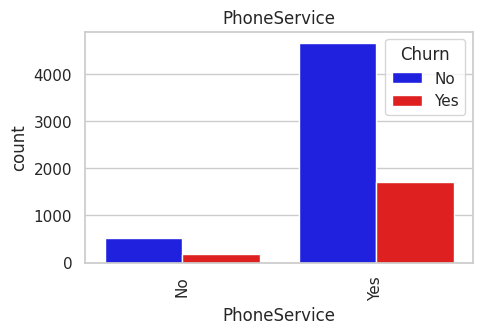

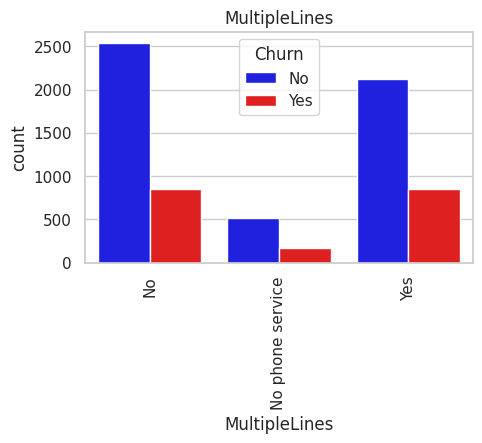

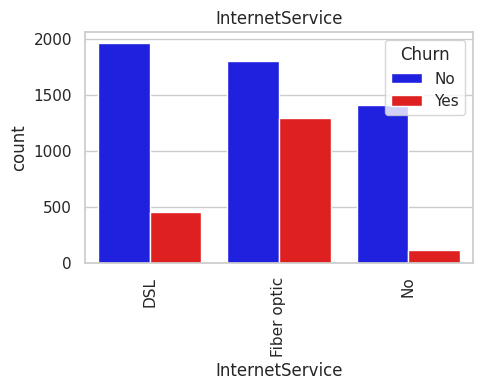

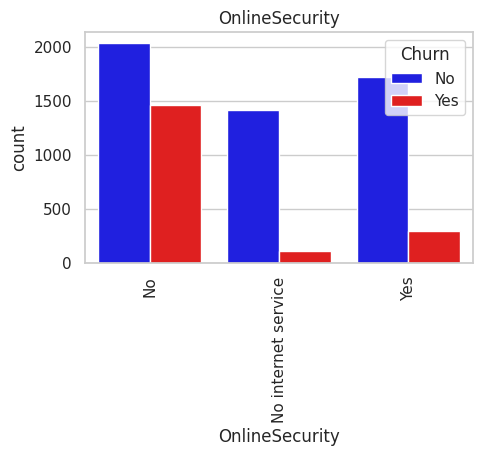

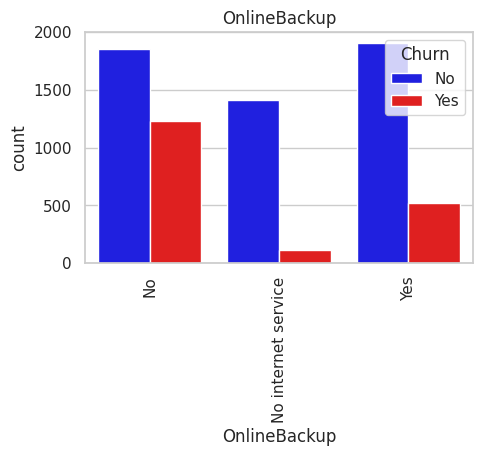

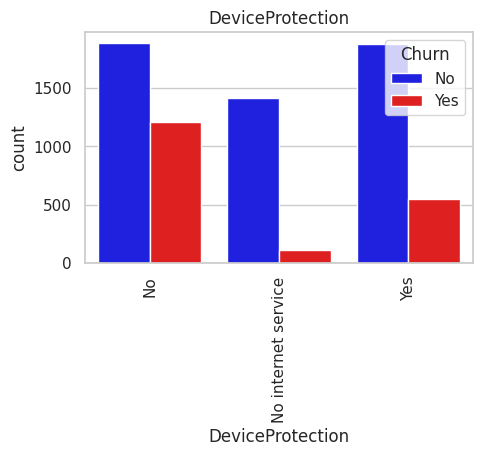

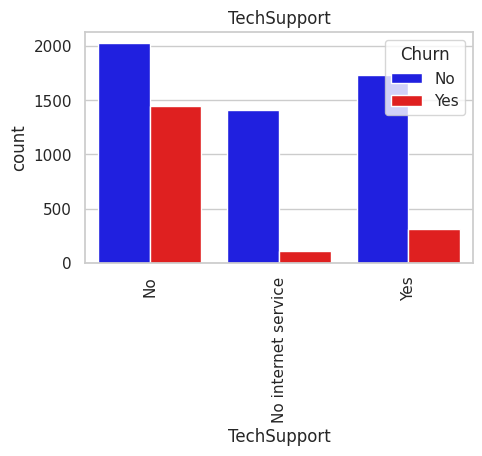

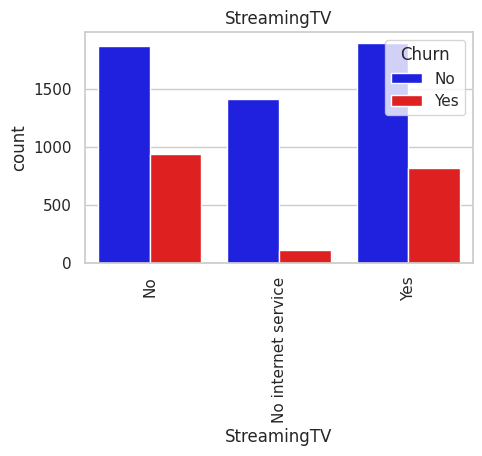

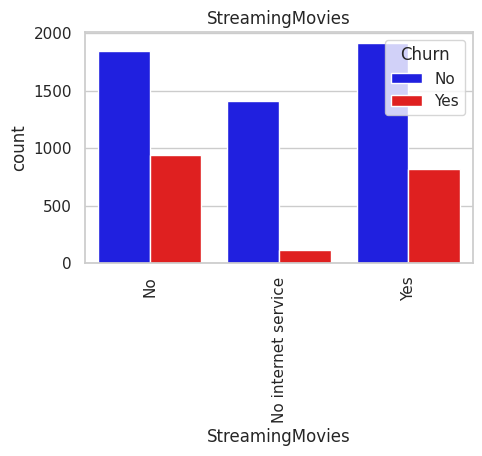

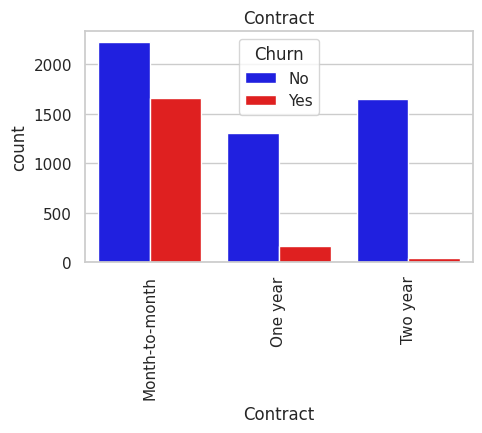

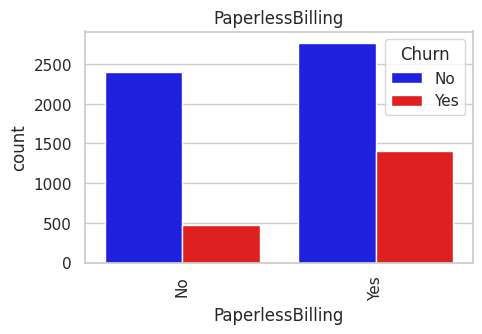

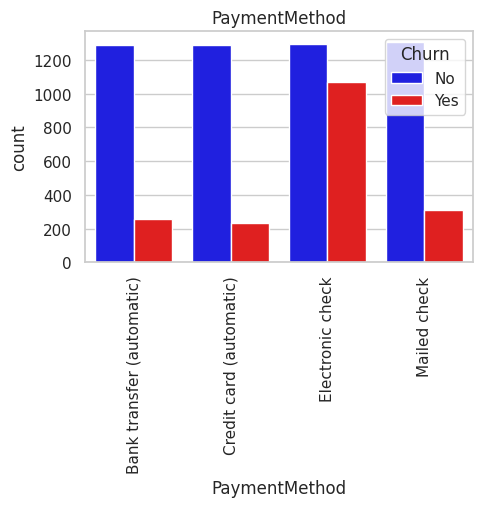

In [27]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=data, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
# Select key categorical features
cat_features = ['gender', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']
for i, feature in enumerate(cat_features):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Churn', data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

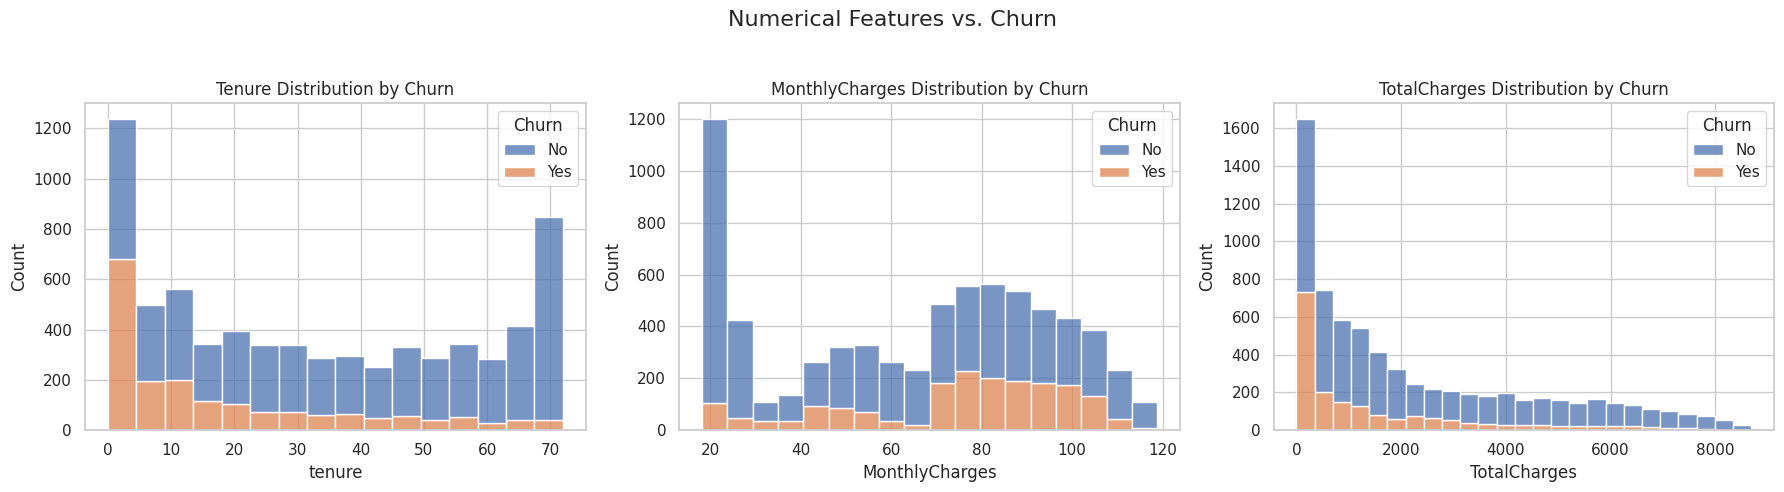

In [17]:
# 3. Numerical Features vs. Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Features vs. Churn', fontsize=16)
# Tenure
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')
 # MonthlyCharges
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[1])
axes[1].set_title('MonthlyCharges Distribution by Churn')

# TotalCharges
sns.histplot(data=data, x='TotalCharges', hue='Churn', multiple='stack', ax=axes[2])
axes[2].set_title('TotalCharges Distribution by Churn')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

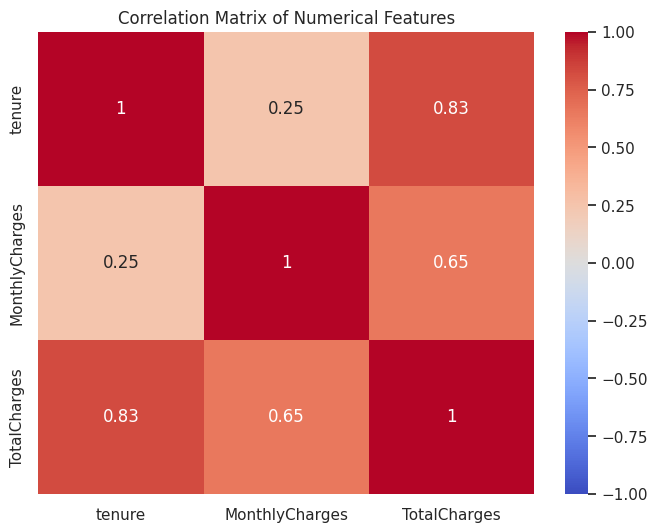

In [18]:
# 4. Correlation Matrix for Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
# 5. Churn Rate by Contract Type (example of deeper analysis)
contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Type:\n", contract_churn)


Churn Rate by Contract Type:
 Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<ipython-input-19-d23a251d1007>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()


##Churn Distribution: The dataset is imbalanced with about 26.5% churn rate.

###Categorical Features
*   Month-to-month contracts may have higher churn rates than one- or two-year contracts.
*   Fiber optic users might churn more than DSL or no-internet users.
*   Electronic check payment method could be associated with higher churn.
*   Those without online security/tech support churn more.


###Numerical Features
*   Low tenure customers are more likely to churn.
*   Higher MonthlyCharges may correlate with churn.
*   TotalCharges may show lower values for churners due to shorter tenure.









#Step 3: Machine Learning for Churn Prediction



In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# 1. Preprocessing
# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].map({'Yes': 1, 'No': 0})  # Convert to binary

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# 2. Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
# 3. Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 0.787 ± 0.014



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.828


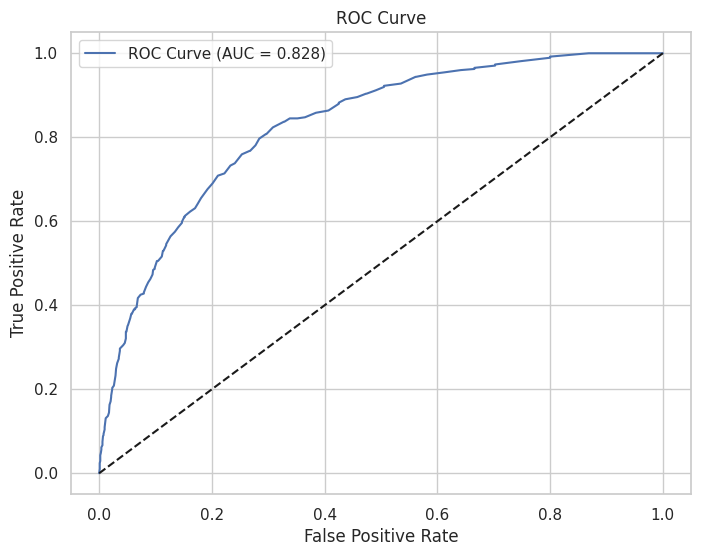

In [23]:
# 4. Evaluation on Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score: {:.3f}".format(roc_auc))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

###ROC of 0.828 indicates good discrimination between churners and non-churners.



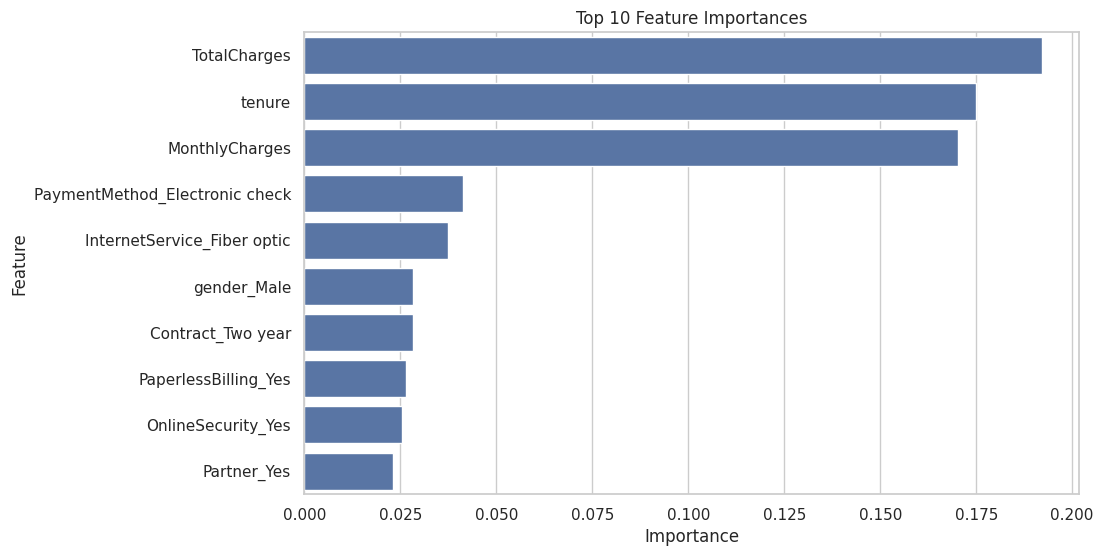


Top 10 Features:
                            Feature  Importance
2                     TotalCharges    0.192229
0                           tenure    0.174901
1                   MonthlyCharges    0.170283
28  PaymentMethod_Electronic check    0.041393
10     InternetService_Fiber optic    0.037420
3                      gender_Male    0.028275
25               Contract_Two year    0.028245
26            PaperlessBilling_Yes    0.026477
13              OnlineSecurity_Yes    0.025586
5                      Partner_Yes    0.023151


In [24]:
# 5. Feature Importance
# Get feature names after one-hot encoding
feature_names = (numerical_cols.tolist() +
                 model.named_steps['preprocessor'].named_transformers_['cat']
                 .get_feature_names_out(categorical_cols).tolist())

# Get feature importances
importances = model.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()
print("\nTop 10 Features:\n", feature_importance.head(10))

## Recommendations Based on Analysis:

1. *Focus on New Customers*: Higher churn in first 12 months suggests improving onboarding.
2. *Review Pricing*: High monthly charges correlate with churn - consider loyalty discounts.
3. *Improve Service Bundles*: Customers with tech support/online security churn less - consider bundling these.
4. *Contract Incentives*: Encourage longer contracts to reduce churn.
5. *Payment Methods*: Electronic check users churn more - consider alternative payment incentives.
6. *Improve customer support* or service quality for Fiber optic users.
7. *Target new customers* (low tenure) with loyalty programs or bundled services.
8. Offer discounts or incentives for longer-term contracts (one- or two-year).

#Integrate predictions into a CRM system to prioritize retention efforts.